<center><h1 style="color:#173F8A;"> Metodos para Ecuaciones Diferenciales, IMT3410, 2024-2 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

<h2 style="color:#03122E;text-align:center;"> Capitulo 4. Metodos para Leyes de Conservacion<br> </h2>
<h3 style="color:#03122E;text-align:center;">             Motivacion <br> </h3>
<hr style="border:3px solid #E3AE00 "> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.optimize import fsolve

# Ecuacion de adveccion, coeficiente constante

Soluci\'on de la ecuacion de advecci\'on
\begin{equation}
\frac{\partial q}{\partial t} + a \frac{\partial q}{\partial x} = 0;\qquad q(x,t) = \sin(x-a t)
\end{equation}

In [2]:
q0 = lambda x: np.sin(np.pi*x)
# coeficiente de adveccion
a = 1.0

#solucion de la ecuacion de adveccion
q = lambda x,t: q0(x-a*(t-0))

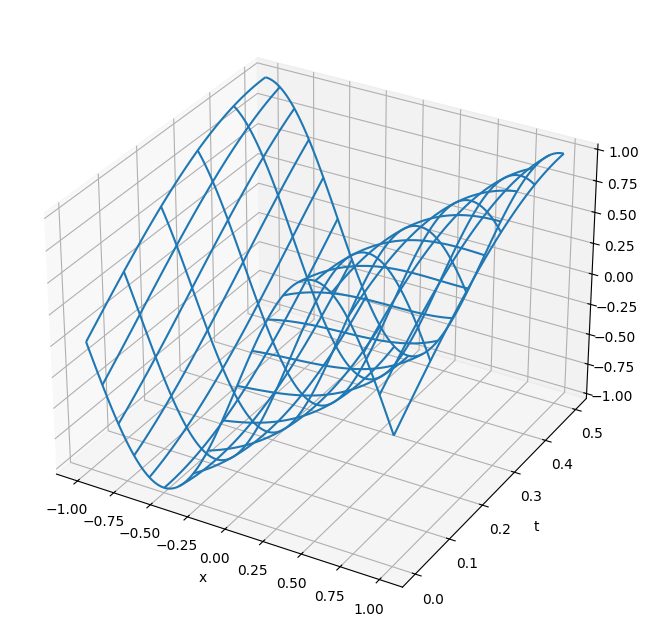

In [9]:
%matplotlib inline
xplot = np.linspace(-1,1,200)
ti = 0.1
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
#plt.plot(xplot, q(xplot,ti))

tplot=np.linspace(0,.5,50)
# Grab some test data.
X,T = np.meshgrid(xplot, tplot)

Z = q(X,T)
#print(Z)
# Plot a basic wireframe.
ax.plot_wireframe(X, T, Z, rstride=10, cstride=10)
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.show()

# Ecuacion de adveccion, coeficiente variable

\begin{equation}
\frac{\partial q}{\partial t} + a(x)\frac{\partial q}{\partial x} = 0; \qquad a(x) = \frac{1}{\pi}\sin(\pi x-1)
\end{equation}
con condici\'on inicial
\begin{equation}
q_0(x) = \sin(\pi x)
\end{equation}
La soluci\'on exacta de la ecuaci\'on es
\begin{equation}
q(x,t) = \sin(2\text{arctan}(\exp(-t)\tan((\pi x-1)/2))+1 )
\end{equation}

In [10]:
q0 = lambda x: np.sin(np.pi*x)
# coeficiente de adveccion
a = lambda x: (1/np.pi)*np.sin(np.pi*x-1)

#solucion de la ecuacion de adveccion
q = lambda x,t: np.sin(2*np.arctan(np.exp(-t)*np.tan((np.pi*x-1)/2))+1 )

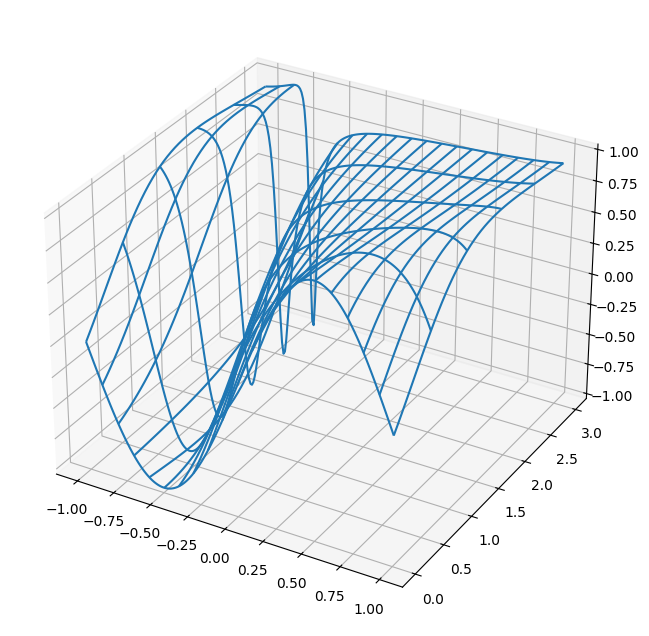

In [12]:
%matplotlib inline
xplot = np.linspace(-1,1,200)
ti = 0.1
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
#plt.plot(xplot, q(xplot,ti))

tplot=np.linspace(0,3,50)
# Grab some test data.
X,T = np.meshgrid(xplot, tplot)

Z = q(X,T)
#print(Z)
# Plot a basic wireframe.
ax.plot_wireframe(X, T, Z, rstride=10, cstride=10)

plt.show()

# Ecuacion de Burgers


\begin{equation}
\frac{\partial q}{\partial t} + \frac{\partial }{\partial x}(q^2/2) = 0; \qquad q_0(x) = -\sin(\pi x)
\end{equation}


In [13]:
q0 = lambda x: -np.sin(np.pi*x)

#solucion de la ecuacion de Burgers
fun = lambda q,x,t: q - q0(x-q*t)
q = lambda x,t: fsolve(lambda q: fun(q,x,t), q0(x))[0]
q(0.1,0.2)

np.float64(-0.6712835630443039)

(50, 200)
(200, 50)


C:\Users\Manuel Sánchez\AppData\Local\Temp\ipykernel_3308\4229562919.py:5: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  q = lambda x,t: fsolve(lambda q: fun(q,x,t), q0(x))[0]
C:\Users\Manuel Sánchez\AppData\Local\Temp\ipykernel_3308\4229562919.py:5: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  q = lambda x,t: fsolve(lambda q: fun(q,x,t), q0(x))[0]


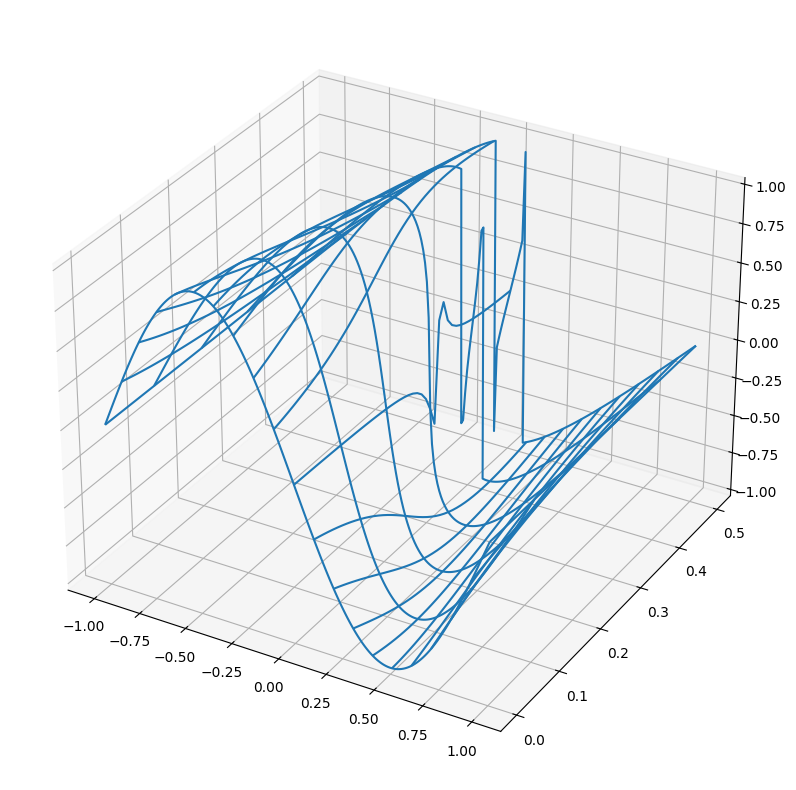

In [14]:
%matplotlib inline

xplot = np.linspace(-1,1,200)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
#plt.plot(xplot, q(xplot,ti))

tplot = np.linspace(0,0.5,50)
# Grab some test data.
X,T = np.meshgrid(xplot, tplot)
print(X.shape)
Z = np.zeros((xplot.size, tplot.size))
print(Z.shape)
for j in range(xplot.size):
    for n in range(tplot.size):
        Z[j,n] = q(xplot[j],tplot[n])
#Z = q(X,T)
#print(Z)
# Plot a basic wireframe.
ax.plot_wireframe(X, T, Z.T, rstride=10, cstride=10)

plt.show()

# Burgers equations - Riemann problem:

In [15]:
def u0Riemann(x,ul,ur):
    if x<0:
        return ul
    else:
        return ur

In [16]:
#solucion de la ecuacion de Burgers
ul = 1
ur = 0.5
u0 = lambda x: u0Riemann(x,ul,ur)
fun = lambda u,x,t: u - u0(x-u*t)
u = lambda x,t: fsolve(lambda u: fun(u,x,t), u0(x))[0]
u(0.1,0.2)

s = (ul+ur)*0.5
ushock = lambda x, t: u0(x-s*t)

(50, 200)
(200, 50)
[[1.  1.  1.  ... 1.  1.  1. ]
 [1.  1.  1.  ... 1.  1.  1. ]
 [1.  1.  1.  ... 1.  1.  1. ]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


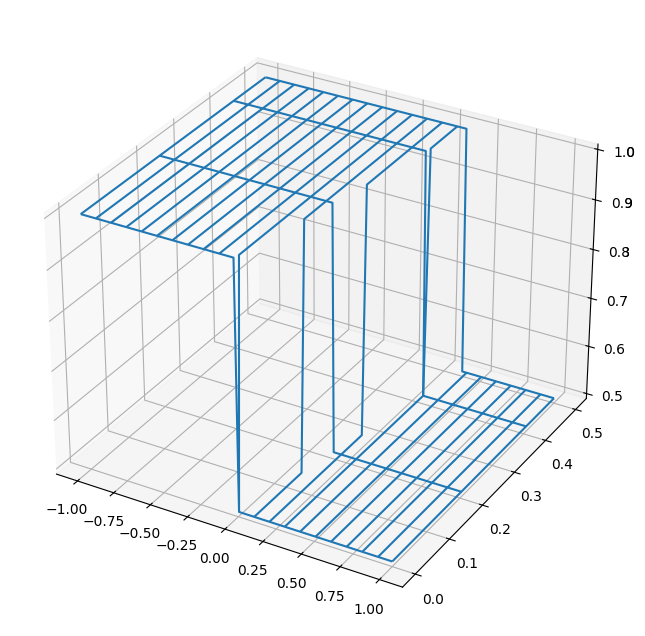

<Figure size 800x800 with 0 Axes>

In [18]:
%matplotlib inline

xplot = np.linspace(-1,1,200)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
#plt.plot(xplot, q(xplot,ti))

tplot = np.linspace(0,0.5,50)
# Grab some test data.
X,T = np.meshgrid(xplot, tplot)
print(X.shape)
Z = np.ones((xplot.size, tplot.size))
Zshock = np.ones((xplot.size, tplot.size))
print(Z.shape)
for j in range(xplot.size):
    for n in range(tplot.size):
        Z[j,n] = u(xplot[j],tplot[n])
        Zshock[j,n] = ushock(xplot[j],tplot[n])
print(Zshock)
# Plot a basic wireframe.
ax.plot_wireframe(X, T, Z.T, rstride=20, cstride=10)
fig2 = plt.figure(figsize=(8,8))
ax2 = fig.add_subplot(projection='3d')
ax2.plot_wireframe(X, T, Zshock.T, rstride=20, cstride=10)
plt.show()

(50, 200)
(200, 50)


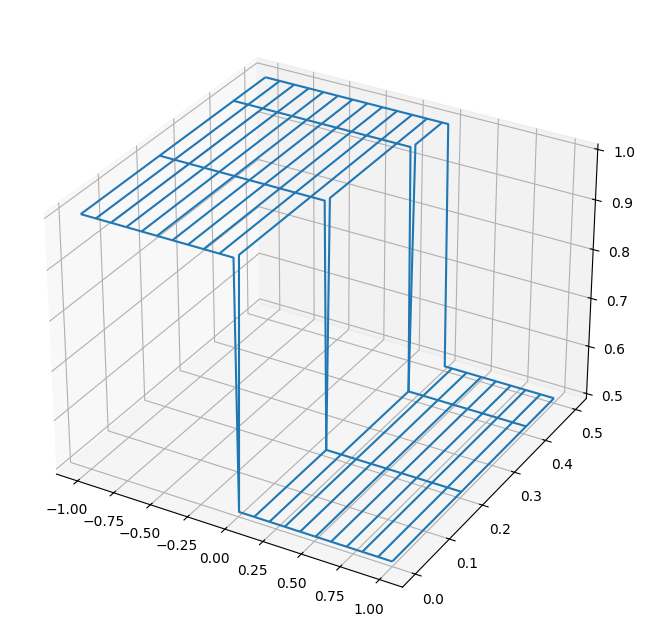

In [19]:
%matplotlib inline

xplot = np.linspace(-1,1,200)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
#plt.plot(xplot, q(xplot,ti))

tplot = np.linspace(0,0.5,50)
# Grab some test data.
X,T = np.meshgrid(xplot, tplot)
print(X.shape)
Z = np.ones((xplot.size, tplot.size))
print(Z.shape)
for j in range(xplot.size):
    for n in range(tplot.size):
        Z[j,n] = u(xplot[j],tplot[n])
#Z = q(X,T)
#print(Z)
# Plot a basic wireframe.
ax.plot_wireframe(X, T, Z.T, rstride=20, cstride=10)

plt.show()